In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('train.csv')

# Variable Name	Description
RETURN	target variable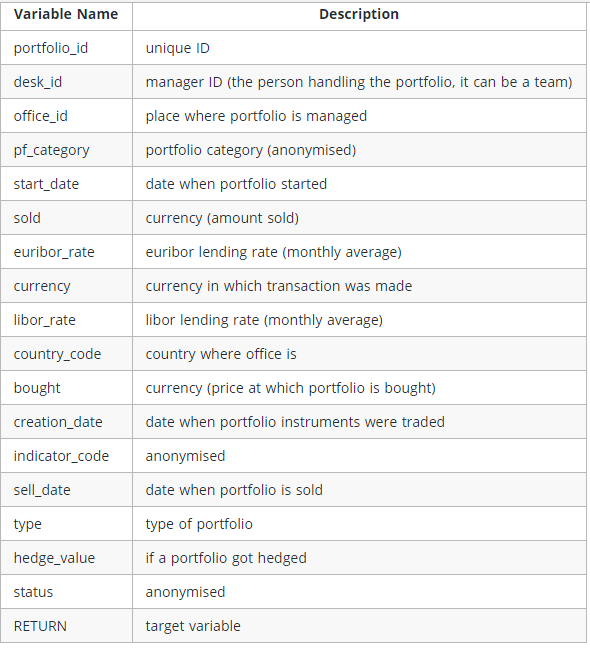

In [3]:
print("train shape row {} and coloumn {}".format(train.shape[0],train.shape[1]))

train shape row 9366 and coloumn 18


In [4]:
for i in train.head(0):
    if(i not in ['bought','libor_rate','sold']):
        train[i].fillna('no_'+i,inplace = True)

In [5]:
train['bought'].fillna(0,inplace = True)
train['libor_rate'].fillna(0,inplace = True)
train['sold'].fillna(0,inplace = True)

In [6]:
train.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,no_indicator_code,20040812,B,no_hedge_value,no_status,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,no_indicator_code,20040812,C,no_hedge_value,no_status,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,no_indicator_code,20040817,A,no_hedge_value,no_status,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,no_indicator_code,20040713,A,no_hedge_value,no_status,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,no_indicator_code,20040713,B,no_hedge_value,no_status,0.02496


In [7]:
from sklearn import preprocessing

In [8]:
for i in train.head(0):
    if(i not in ['portfolio_id','start_date','sold','euribor_rate','libor_rate','bought','creation_date','sell_date',
                 'return']):
        lbl = preprocessing.LabelEncoder()
        train[i] = lbl.fit_transform(train[i].astype(str))

In [9]:
train.head(10)

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,0,1,1,20040720,110000000.0,2,0.02074,4,2.332216,1.098097e+08,20040720,1,20040812,1,2,1,0.02496
1,PF00001003,1,0,0,20040709,176671000.0,1,0.02074,2,5.269617,1.760084e+08,20040723,1,20040812,2,2,1,0.05496
2,PF00001005,2,0,0,20040723,56474000.0,2,0.02074,4,2.332216,5.637953e+07,20040723,1,20040817,0,2,1,0.02496
3,PF00001006,3,0,0,20040609,164813000.0,2,0.02074,4,2.332216,1.645088e+08,20040723,1,20040713,0,2,1,0.02496
4,PF00001007,3,1,1,20040609,140800000.0,2,0.02074,4,2.332216,1.405402e+08,20040723,1,20040713,1,2,1,0.02496
5,PF00001008,4,0,0,20040707,48741000.0,2,0.02074,4,2.332216,4.865127e+07,20040726,1,20040810,0,2,1,0.02490
6,PF00001010,5,0,0,20040706,60593500.0,2,0.02074,4,2.332216,6.048181e+07,20040726,1,20040809,0,2,1,0.02493
7,PF00001011,5,1,1,20040706,134200000.0,2,0.02074,4,2.332216,1.339526e+08,20040726,1,20040809,1,2,1,0.02493
8,PF00001012,6,0,0,20040419,82929000.0,2,0.02074,4,2.332216,8.250616e+07,20040726,1,20040720,0,2,1,0.02460
9,PF00001016,7,0,0,20040414,212476000.0,2,0.02074,4,2.332216,2.114140e+08,20040727,1,20040713,0,2,1,0.02466


In [10]:
train_data = train.iloc[:,1:17]

In [11]:
label = train.iloc[:,-1]

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(train_data)
T = pca.transform(train_data)

import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)

get_important_features(T, pca.components_, train_data.columns.values)



Features by importance:
 [(13100104763.855515, 'sold'), (13096072265.879667, 'bought'), (318704.83664803597, 'sell_date'), (315138.1139010305, 'start_date'), (315036.86253201315, 'creation_date'), (11418.897368888924, 'desk_id'), (14.97763463923563, 'libor_rate'), (13.398945071302101, 'type'), (12.251059495316861, 'currency'), (9.236860857479437, 'hedge_value'), (6.8726283422467915, 'country_code'), (6.578302655977027, 'pf_category'), (5.703624535704852, 'indicator_code'), (4.197307669227317, 'office_id'), (3.170614750734798, 'status'), (0.18771874629685356, 'euribor_rate')]


In [13]:
print("origina train data shap :: {} scaling data shae :: {}".format(train.shape,train_data.shape))

origina train data shap :: (9366, 18) scaling data shae :: (9366, 16)


In [14]:
rbs = preprocessing.RobustScaler()

In [15]:
#tran_inp_data = rbs.fit_transform(train_data)
from scipy.stats import zscore
scalled_train_data = train_data.apply(zscore)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_data.shape

(9366, 16)

In [18]:
date = pd.DataFrame()
amt = pd.DataFrame()

rate = pd.DataFrame()
date2 = pd.DataFrame()


date=train['sell_date'] -train['start_date'] 
amt =train['sold'] - train['bought']

date2=(train['sell_date'] -train['creation_date'])*train['libor_rate'] 

s1 = pd.Series(date, name='date')
s2=pd.Series(amt,name = 'amt')

s3=pd.Series(date2,name = 'date2')

result = pd.concat([train[['desk_id','office_id','pf_category','hedge_value','type']], s1,s2], axis=1)

#result = pd.concat([train[['desk_id','euribor_rate','type','hedge_value','pf_category']],s1,s2], axis=1)

#,'libor_rate','euribor_rate'
#'creation_date',,'status','euribor_rate,'indicator_code','office_id','country_code','currency'

In [19]:
from scipy.stats import zscore
result = result.apply(zscore)

In [20]:
result.head()

,desk_id,office_id,pf_category,hedge_value,type,date,amt
0,-2.430874,0.671040,-0.435262,0.753581,-0.958064,-0.248581,0.416035
1,-2.430054,-1.490225,-1.513745,0.753581,-0.391322,-0.243553,2.239968
2,-2.429234,-1.490225,-1.513745,0.753581,-1.524807,-0.247667,0.045747
3,-2.428414,-1.490225,-1.513745,0.753581,-1.524807,-0.243096,0.855662
4,-2.428414,0.671040,-0.435262,0.753581,-0.958064,-0.243096,0.684498


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set(style="ticks")

#for i in result.head(0):
    #sns.distplot(result[i]);
    #print(i)
    #sns.pairplot(result)
    #plt.show()

In [22]:
x_train,x_test,y_train,y_test = train_test_split(result,label,test_size = 0.02,random_state = 30)

In [23]:
#from sklearn.feature_selection import VarianceThreshold
#sel = VarianceThreshold(threshold=(.8* (1 - .8)))
#result = sel.fit_transform(result)

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
# =   RandomForestRegressor(bootstrap = True, max_features = 'sqrt', min_samples_split =8, n_estimators = 10).fit(x_train, y_train)

# = SelectFromModel(clfr, prefit=True)
# = model.transform(x_train)
#x_test = model.transform(x_test)
#x_train = X_new

In [24]:
#X_train = rbs.fit_transform(x_train)
#X_test = rbs.fit_transform(x_test)
X_train = x_train
X_test = x_test

In [25]:
[X_train.shape,y_train.shape,X_test.shape,y_test.shape]

[(9178, 7), (9178,), (188, 7), (188,)]

In [26]:
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [27]:
clf = svm.SVR().fit(X_train,y_train)
lm = LinearRegression().fit(X_train,y_train)

In [28]:
y_pred = clf.predict(X_test)
lm_pred = lm.predict(X_test)

In [29]:
from sklearn.model_selection import cross_val_score
scoreslm = cross_val_score(clf, X_train, y_train, cv=5)
scoreslm

array([-18.7789508 , -16.51387537, -18.69037494,  -8.95349423, -16.24672513])

In [30]:
from sklearn.metrics import r2_score

In [31]:
print("SVR::{},LM::{}".format(r2_score(y_test,y_pred),r2_score(y_test,lm_pred)))

SVR::-19.46760660413443,LM::0.7715810613436931


In [32]:
#for idx, col_name in enumerate(x_train.columns):
#    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][idx]))

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
#clf_rf = RandomForestRegressor(n_estimators = 100,random_state = 0,max_features = 8, max_depth = 6,n_jobs = -1).fit(X_train, y_train)
#clf_rm = RandomForestRegressor(bootstrap = True, max_features = 'sqrt', min_samples_split =4, n_estimators = 100)
clf_rm = RandomForestRegressor(bootstrap = True, max_features = 'sqrt', min_samples_split =8,max_depth = 100, n_estimators = 50)




In [34]:
clf_rf = clf_rm.fit(X_train, y_train)

In [35]:
#rf_predct = clf_rf.predict(rbs.fit_transform(X_test))
rf_predct = clf_rf.predict(X_test)

In [36]:
#r2_score(y_train,clf_rf.predict(rbs.fit_transform(X_train)))
r2_score(y_train,clf_rf.predict(X_train))

0.91257394768239575

In [37]:
r2_score(y_test,rf_predct)

0.98093539705792054

In [38]:
from sklearn.model_selection import cross_val_score
scoresrf = cross_val_score(clf_rf, X_train, y_train, cv=5)

In [39]:
scoresrf

array([ 0.97193986,  0.93843106,  0.92645438,  0.51289094,  0.81782856])

In [40]:
scoresrf.mean()

0.83350895766888244

Test Data

In [41]:
test = pd.read_csv('test.csv')

In [42]:
test.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,PF00001001,DSK00001001,OFF00001001,A,20040720,171831000.0,T,0.02074,USD,2.332216,1.715337e+08,20040720,NaN,20040812,A,NaN,NaN
1,PF00001004,DSK00001003,OFF00001002,B,20040723,56485000.0,T,0.02074,USD,2.332216,5.638038e+07,20040723,NaN,20040719,B,NaN,NaN
2,PF00001009,DSK00001007,OFF00001001,A,20040607,41734000.0,T,0.02074,USD,2.332216,4.166179e+07,20040726,NaN,20040709,A,NaN,NaN
3,PF00001013,DSK00001011,OFF00001001,A,20040716,82951000.0,T,0.02074,USD,2.332216,8.250936e+07,20040726,NaN,20041019,A,NaN,NaN
4,PF00001014,DSK00001012,OFF00001001,A,20040713,73293000.0,T,0.02074,USD,2.332216,7.317055e+07,20040726,NaN,20040813,A,NaN,NaN


In [43]:
for i in test.head(0):
    if(i not in ['bought','libor_rate','sold']):
        test[i].fillna('no_'+i,inplace = True)

In [44]:
test['bought'].fillna(0,inplace = True)
test['libor_rate'].fillna(0,inplace = True)
test['sold'].fillna(0,inplace = True)

In [45]:
for i in test.head(0):
    if(i not in ['portfolio_id','start_date','sold','euribor_rate','libor_rate','bought','creation_date','sell_date',
                 'return']):
        lbl = preprocessing.LabelEncoder()
        test[i] = lbl.fit_transform(test[i].astype(str))

In [46]:
test.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,PF00001001,0,0,0,20040720,171831000.0,2,0.02074,4,2.332216,1.715337e+08,20040720,1,20040812,0,2,1
1,PF00001004,1,1,1,20040723,56485000.0,2,0.02074,4,2.332216,5.638038e+07,20040723,1,20040719,1,2,1
2,PF00001009,2,0,0,20040607,41734000.0,2,0.02074,4,2.332216,4.166179e+07,20040726,1,20040709,0,2,1
3,PF00001013,3,0,0,20040716,82951000.0,2,0.02074,4,2.332216,8.250936e+07,20040726,1,20041019,0,2,1
4,PF00001014,4,0,0,20040713,73293000.0,2,0.02074,4,2.332216,7.317055e+07,20040726,1,20040813,0,2,1


In [47]:
test_data = test.iloc[:,1:17]

In [48]:
date_t = pd.DataFrame()
date2_t = pd.DataFrame()
amt_t = pd.DataFrame()
rate_t = pd.DataFrame()

date_t= test['sell_date']-test['start_date']
amt_t =test['sold'] - test['bought']


date2_t=(test['sell_date'] -test['creation_date'])*test['libor_rate'] 

s1_t = pd.Series(date_t, name='date')
s2_t=pd.Series(amt_t,name = 'amt')

s3_t=pd.Series(date2_t,name = 'date2_t')

result_t = pd.concat([test[['desk_id','office_id','pf_category','hedge_value','type']], s1_t,s2_t], axis=1)
#result_t = pd.concat([test[['desk_id','euribor_rate','type','hedge_value','pf_category']],s1_t,s2_t], axis=1)


In [49]:
#result_t = sel.fit_transform(result_t)
#result_t = model.transform(result_t)

In [50]:
#test_data.drop(['start_date','creation_date','sell_date'],axis = 1,inplace = True)

In [51]:
from scipy.stats import zscore
result_t = result_t.apply(zscore)

In [52]:
#test_data_pred_SVR = clf.predict(rbs.fit_transform(result_t))
#test_data_pred_LM =lm.predict(rbs.fit_transform(result_t))
#test_data_pred_rf = clf_rf.predict(rbs.fit_transform(result_t))
test_data_pred_rf = clf_rf.predict(result_t)

In [53]:
submission = pd.DataFrame({'portfolio_id':test['portfolio_id'],
            'return':test_data_pred_rf})

In [54]:
import os
try:
    os.remove('submission.csv')
except OSError:
    pass

In [55]:
submission.to_csv('submission.csv',index = False)

In [101]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import ExtraTreesClassifier

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,50,100,1000],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            "max_depth":[10,20,30,40,100]
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
    grid.fit(X_train, y_train)
    return grid.best_score_ , grid.best_params_

In [ ]:
Grid_Search_CV_RFR(X_train, y_train)